In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the data
data = pd.read_csv("y_train.csv")
data2 = pd.read_csv("x_train.csv")
x_test =  pd.read_csv("x_test.csv")

In [3]:
#Merging the data
data2 = data2.assign(Target = data['target'] )


In [4]:
data2.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0


In [5]:
city = data2.city.unique()
print("Different classes in city feature:", *city)

Different classes in city feature: city_61 city_94 city_114 city_16 city_98 city_11 city_160 city_23 city_21 city_67 city_75 city_7 city_65 city_71 city_77 city_83 city_103 city_19 city_136 city_126 city_90 city_36 city_27 city_101 city_173 city_30 city_40 city_102 city_116 city_24 city_41 city_149 city_165 city_44 city_64 city_57 city_46 city_166 city_100 city_145 city_45 city_97 city_28 city_50 city_176 city_73 city_20 city_141 city_138 city_39 city_115 city_128 city_152 city_142 city_105 city_104 city_162 city_74 city_157 city_131 city_89 city_70 city_1 city_2 city_159 city_13 city_53 city_150 city_9 city_76 city_123 city_72 city_14 city_54 city_91 city_10 city_144 city_78 city_109 city_117 city_84 city_48 city_99 city_175 city_79 city_43 city_33 city_8 city_37 city_80 city_106 city_31 city_93 city_107 city_143 city_179 city_42 city_82 city_139 city_155 city_81 city_69 city_26 city_55 city_134 city_129 city_158 city_12 city_62 city_146 city_167 city_180 city_120 city_18 city_118 cit

In [6]:
relevent_exp = data2.relevent_experience.unique()
print("Different classes in relevant_experience feature:", *relevent_exp)

Different classes in relevant_experience feature: Has relevent experience No relevent experience


In [7]:
enrolled_uni = data2.enrolled_university.unique()
print("Different classes in enrolled_university feature:", *enrolled_uni)

Different classes in enrolled_university feature: no_enrollment nan Full time course Part time course


In [8]:
city_development_index = data2.city_development_index.unique()
print("Different classes in city_development_indexenrolled_university feature:", *city_development_index)

Different classes in city_development_indexenrolled_university feature: 0.913 0.698 0.926 0.91 0.949 0.55 0.92 0.899 0.624 0.855 0.939 0.647 0.802 0.884 0.83 0.923 0.682 0.897 0.479 0.893 0.848 0.5579999999999999 0.878 0.7759999999999999 0.804 0.743 0.8270000000000001 0.6890000000000001 0.903 0.725 0.6659999999999999 0.866 0.762 0.649 0.887 0.555 0.89 0.925 0.8959999999999999 0.764 0.754 0.7959999999999999 0.763 0.836 0.898 0.789 0.527 0.727 0.794 0.924 0.767 0.579 0.769 0.68 0.847 0.7879999999999999 0.843 0.74 0.738 0.795 0.856 0.691 0.895 0.84 0.701 0.493 0.915 0.516 0.4479999999999999 0.807 0.865 0.518 0.512 0.563 0.693 0.487 0.556 0.73 0.7390000000000001 0.625 0.7659999999999999 0.64 0.645 0.735 0.921 0.78 0.8240000000000001 0.722 0.745 0.7809999999999999 0.742 0.775 0.664


In [9]:
gender = data2.gender.unique()
print("Different classes in gender feature:", *gender)

Different classes in gender feature: Male nan Female Other


In [10]:
edu_level = data2.education_level.unique()
print("Different classes in gender feature:", *edu_level)

Different classes in gender feature: Masters High School Graduate Phd nan Primary School


In [11]:
company_type = data2.company_type.unique()
print("Different classes in company_type feature:", *company_type)

Different classes in company_type feature: NGO nan Pvt Ltd Public Sector Early Stage Startup Funded Startup Other


In [12]:
major_discipline = data2.major_discipline.unique()
print("Different classes in major_discipline feature:", *major_discipline)

Different classes in major_discipline feature: STEM nan No Major Other Arts Humanities Business Degree


In [13]:
target = data.target.unique()
print("Different classes in target feature:", *target)

Different classes in target feature: 0.0 1.0


In [14]:
rows,cols = data.shape
print("Shape of the dataframe:", data.shape)
print("% missing values:" ,round(data.isnull().sum().sum()/rows,2))

Shape of the dataframe: (14368, 2)
% missing values: 0.0


Visualize distribution of each feature using graphs

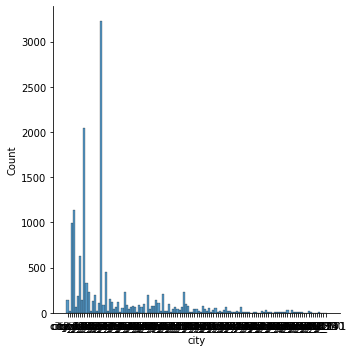

In [15]:
sns.displot(data2, x="city",)


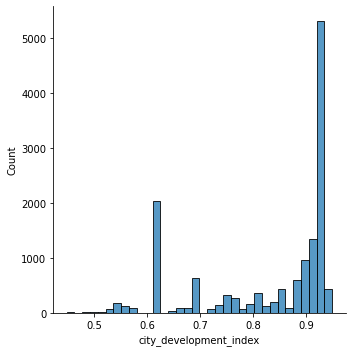

In [16]:
sns.displot(data2, x="city_development_index")

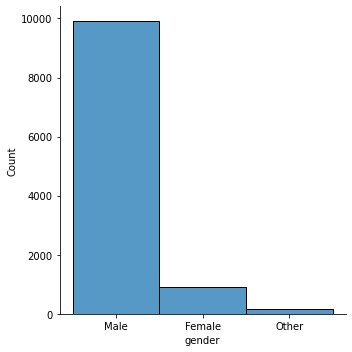

In [17]:
sns.displot(data2, x="gender")

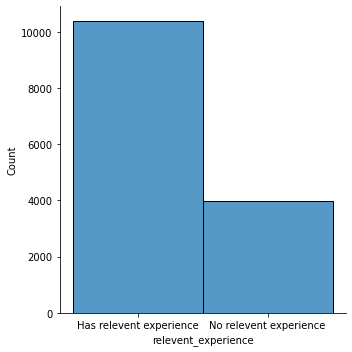

In [18]:
sns.displot(data2, x="relevent_experience")

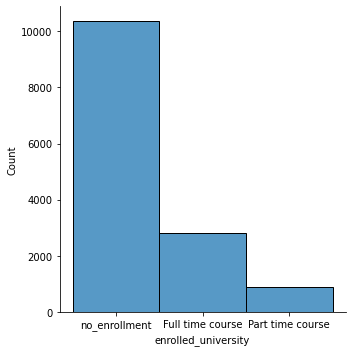

In [19]:
sns.displot(data2, x="enrolled_university")

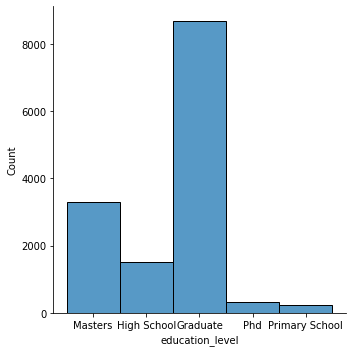

In [20]:
sns.displot(data2, x="education_level")

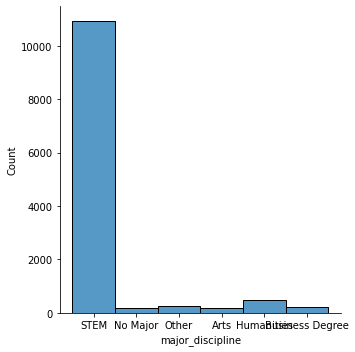

In [21]:
sns.displot(data2, x="major_discipline")

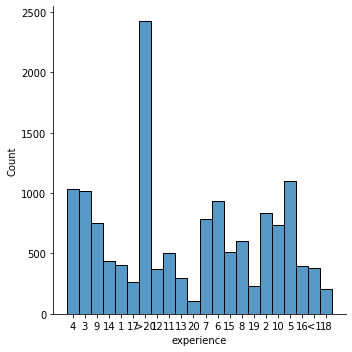

In [22]:
sns.displot(data2, x="experience")

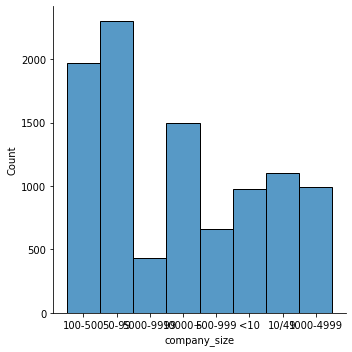

In [23]:
sns.displot(data2, x="company_size")

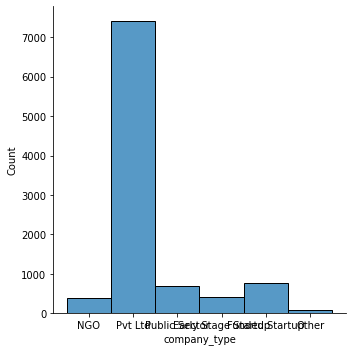

In [24]:
sns.displot(data2, x="company_type")

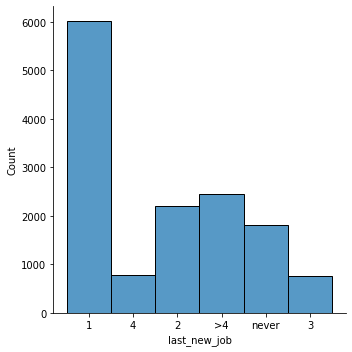

In [25]:
sns.displot(data2, x="last_new_job")

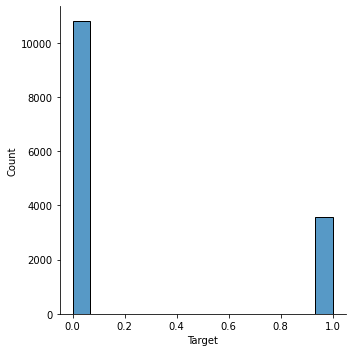

In [26]:
sns.displot(data2, x="Target")

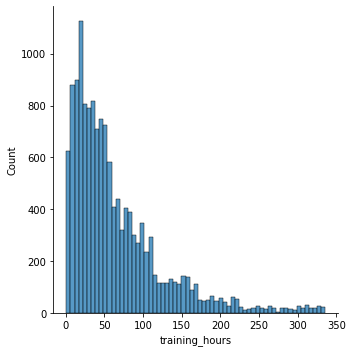

In [27]:
sns.displot(data2, x="training_hours")

Visualize the relationship of each feature with target variable

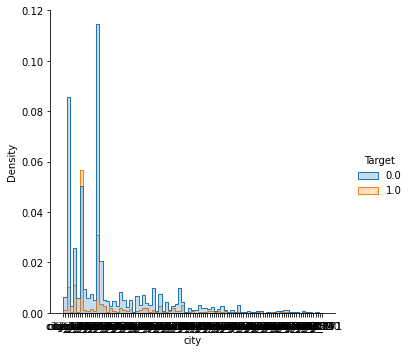

In [28]:
sns.displot(data2, x = "city", hue = "Target", stat = "density" , element = "step",discrete=False)

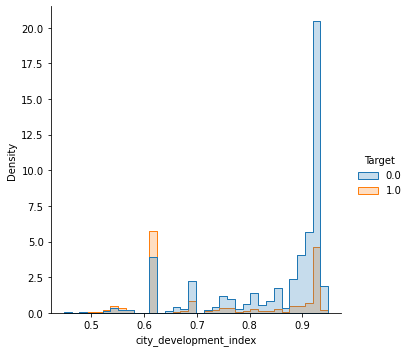

In [29]:
sns.displot(data2, x = "city_development_index", hue = "Target", stat = "density" , element = "step")

In [30]:
pd.crosstab(data2.gender, data2.Target)

Target,0.0,1.0
gender,,
Female,684,230
Male,7644,2270
Other,107,40


In [31]:
pd.crosstab(data2.relevent_experience, data2.Target)

Target,0.0,1.0
relevent_experience,,
Has relevent experience,8169,2216
No relevent experience,2636,1347


In [32]:
pd.crosstab(data2.enrolled_university, data2.Target)

Target,0.0,1.0
enrolled_university,,
Full time course,1739,1071
Part time course,670,230
no_enrollment,8195,2171


In [33]:
pd.crosstab(data2.education_level, data2.Target)

Target,0.0,1.0
education_level,,
Graduate,6271,2408
High School,1204,301
Masters,2606,705
Phd,261,49
Primary School,196,29


In [34]:
pd.crosstab(data2.major_discipline, data2.Target)

Target,0.0,1.0
major_discipline,,
Arts,155,40
Business Degree,162,64
Humanities,385,108
No Major,128,44
Other,201,67
STEM,8093,2832


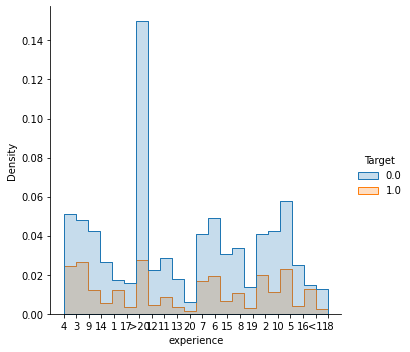

In [35]:
sns.displot(data2, x = "experience", hue = "Target", stat = "density" , element = "step",discrete=False)

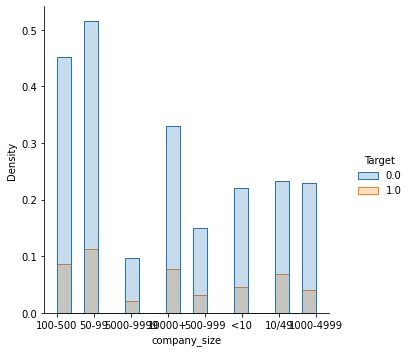

In [36]:
sns.displot(data2, x = "company_size", hue = "Target", stat = "density" , element = "step",discrete=False)

In [37]:
pd.crosstab(data2.last_new_job, data2.Target)

Target,0.0,1.0
last_new_job,,
1,4462,1558
2,1687,524
3,579,182
4,600,174
>4,2002,457
never,1267,549


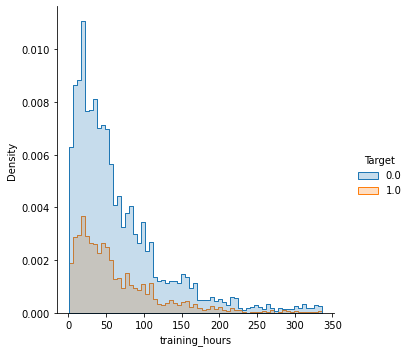

In [38]:
sns.displot(data2, x = "training_hours", hue = "Target", stat = "density" , element = "step",discrete=False)

Handle missing values

In [39]:
data2.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
Target                       0
dtype: int64

In [40]:
#deleting rows - missed vales
data2.dropna(inplace=True)
print(data2.isnull().sum())

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
Target                    0
dtype: int64


Create new features using combinations / transformations of existing features

In [41]:
data2.dtypes

index                       int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
Target                    float64
dtype: object

In [42]:
mean_training = data2.groupby('city')["training_hours"].mean().rename("training_mean").reset_index() 
data2 = data2.merge(mean_training)

In [43]:
#create log-transformed data
data2['city_development_index_log'] = np.log(data2['city_development_index']).astype(float)


Scale the features for models that require scaling and perform required pre-processing

In [44]:
#one hot encoding
pd.get_dummies(data=data2)

,index,city_development_index,training_hours,Target,training_mean,city_development_index_log,city_city_1,city_city_10,city_city_100,city_city_101,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,17007,0.913,22,0.0,54.358974,-0.091019,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,14755,0.913,160,0.0,54.358974,-0.091019,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1922,0.913,7,0.0,54.358974,-0.091019,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,14970,0.913,13,0.0,54.358974,-0.091019,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5727,0.913,3,0.0,54.358974,-0.091019,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,9062,0.794,29,0.0,26.000000,-0.230672,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6701,15737,0.794,13,0.0,26.000000,-0.230672,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6702,9219,0.518,19,0.0,19.000000,-0.657780,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6703,7638,0.745,4,0.0,4.000000,-0.294371,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
data2

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Target,training_mean,city_development_index_log
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0,54.358974,-0.091019
1,14755,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,<10,Pvt Ltd,1,160,0.0,54.358974,-0.091019
2,1922,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,Other,10,5000-9999,Public Sector,1,7,0.0,54.358974,-0.091019
3,14970,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,500-999,Pvt Ltd,>4,13,0.0,54.358974,-0.091019
4,5727,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,1,3,0.0,54.358974,-0.091019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,9062,city_37,0.794,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,10/49,Pvt Ltd,1,29,0.0,26.000000,-0.230672
6701,15737,city_37,0.794,Female,Has relevent experience,no_enrollment,Graduate,STEM,9,50-99,Public Sector,1,13,0.0,26.000000,-0.230672
6702,9219,city_107,0.518,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,NGO,1,19,0.0,19.000000,-0.657780
6703,7638,city_127,0.745,Male,Has relevent experience,no_enrollment,Masters,STEM,15,<10,Pvt Ltd,>4,4,0.0,4.000000,-0.294371


In [46]:
X = data2[['city_development_index', 'training_hours']]
scale = StandardScaler()
temp = scaledX[:6705,0]
temp2 = scaledX[:6705,1]
scaledX = scale.fit_transform(X)

data2['city_development_index'] = temp
data2['training_hours'] = temp2

NameError: name 'scaledX' is not defined

In [ ]:
data2

Explain the following terms in detail (9 points)

Pearson’s correlation:
also known as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC),is a proportion of straight connection between's two sets of data. It is the proportion between the covariance of two factors and the result of their standard deviations; in this way it is basically a standardized estimation of the covariance, to such an extent that the outcome generally has a worth somewhere in the range of −1 and 1.


T – test:
A t-test is a kind of inferential measurement used to decide whether there is a huge distinction between the means for two groups, which might be connected in specific highlights.
Ascertaining a t-test requires three key data values. They incorporate the contrast between the mean values from every data set(called the mean distinction), the standard deviation of each group, and the quantity of data values of each group.

Chi squared test:
The chi-square test is a theory test intended to test for a measurably critical connection among nominal and ordinal factors coordinated in a bivariate table. At the end of the day, it lets us know whether two factors are independent of each other
The acquired chi-square measurement basically sums up the contrast between the frequencies really saw in a bivariate table and the frequencies we would hope to check whether there were no connection between the two factors.

Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix.

In [ ]:
my_rho = np.corrcoef(data2['city_development_index'], data2['training_hours'])
my_rho
sns.heatmap(my_rho)

Perform t test on continuous features after dividing them using target variable.

In [ ]:
rvs1 = data2['city_development_index']
rvs2 = data2['training_hours']

stats.ttest_ind(rvs1, rvs2)

 Perform Chi squared test among categorical variables and with the target variable

In [50]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / 
        df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    return chi_square_score, degree_f

SyntaxError: invalid syntax (2293013059.py, line 15)

In [47]:
data2

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Target,training_mean,city_development_index_log
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0,54.358974,-0.091019
1,14755,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,<10,Pvt Ltd,1,160,0.0,54.358974,-0.091019
2,1922,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,Other,10,5000-9999,Public Sector,1,7,0.0,54.358974,-0.091019
3,14970,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,500-999,Pvt Ltd,>4,13,0.0,54.358974,-0.091019
4,5727,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,1,3,0.0,54.358974,-0.091019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,9062,city_37,0.794,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,10/49,Pvt Ltd,1,29,0.0,26.000000,-0.230672
6701,15737,city_37,0.794,Female,Has relevent experience,no_enrollment,Graduate,STEM,9,50-99,Public Sector,1,13,0.0,26.000000,-0.230672
6702,9219,city_107,0.518,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,NGO,1,19,0.0,19.000000,-0.657780
6703,7638,city_127,0.745,Male,Has relevent experience,no_enrollment,Masters,STEM,15,<10,Pvt Ltd,>4,4,0.0,4.000000,-0.294371
